### Convolutional Neural Networks
Example of identification of handwritten digits from: 'https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/'

In [1]:
# import datasets
import tensorflow as tf
from keras.datasets import mnist
from matplotlib import pyplot

In [2]:
#Load dataset
(trainX, trainy),(testX,testy) = mnist.load_data()


In [3]:
#Summarize loaded dataset
print('Train sets: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test sets: X=%s, y=%s' % (testX.shape, testy.shape))

Train sets: X=(60000, 28, 28), y=(60000,)
Test sets: X=(10000, 28, 28), y=(10000,)


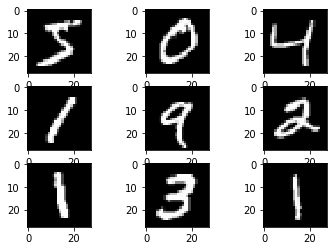

In [6]:
#plot a few images:
for i in range(9):
    #define subplot:
    pyplot.subplot(330+1+i)
    #plot raw pixel data
    pyplot.imshow(trainX[i],cmap=pyplot.get_cmap('gray'))
#show figure
pyplot.show()

In [4]:
#Normalize image features
trainX,testX=trainX/255.0, testX/255.0

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [6]:
model.fit(trainX, trainy, epochs=5)
model.evaluate(testX, testy, verbose=2)


Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2946 - accuracy: 0.9145
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1441 - accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1085 - accuracy: 0.9671
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0877 - accuracy: 0.9725
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0759 - accuracy: 0.9760
313/313 - 0s - loss: 0.0793 - accuracy: 0.9763


[0.0793227106332779, 0.9763000011444092]